<a href="https://colab.research.google.com/github/Lossophy/BINA-Projekt/blob/main/Semesterarbeit_BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modularbeit BINA

Autoren:

Viktor Lang, Adrian Sigenthaler, Alexander Gronau, Ulf Jochum

#Einleitung

Die Energieversorgung ist ein signifikanter Faktor für die wirtschaftliche und gesellschaftliche Entwicklung eines Landes. In der Schweiz unterliegt die Zusammensetzung der genutzten Energieträger seit 1980 einem kontinuierlichen Wandel. Technologische Fortschritte, geopolitische Entwicklungen, gesetzliche Rahmenbedingungen sowie ein wachsendes Umweltbewusstsein haben die Energiepolitik und den Energiemarkt zunehmend beeinflusst. In diesem Zusammenhang ist sowohl die Sicherstellung einer stabilen Versorgung als auch die Reduktion von CO2-Emissionen und der Ausbau erneuerbarer Energien von entscheidender Bedeutung.

Ein bedeutender Meilenstein in der Schweizer Energiepolitik war die Annahme der Energiestrategie 2050 im Jahr 2017. Diese sieht unter anderem den schrittweisen Ausstieg aus der Kernenergie sowie eine verstärkte Förderung von Energieeffizienz und erneuerbaren Energien vor. Diese Strategie wurde massgeblich durch die Nuklearkatastrophe von Fukushima im Jahr 2011 beeinflusst und markiert eine grundlegende Neuausrichtung der nationalen Energieplanung. Bereits zuvor hatte sich ein Trend zur Diversifikation des Energiemixes abgezeichnet, begleitet von einer allmählichen Reduktion des Anteils fossiler Energieträger.

Die vorliegende Analyse hat die Entwicklung der Energieträger in der Schweiz im Zeitraum von 1980 bis 2023 zum Gegenstand. Gegenstand der Untersuchung sind dabei Veränderungen im Gesamtenergieverbrauch sowie die Bedeutung einzelner Energieträger wie Erdöl, Erdgas, Wasserkraft, Kernenergie sowie Solar- und Windenergie. Des Weiteren werden strukturelle Verschiebungen zwischen den Sektoren Haushalte, Industrie, Verkehr und Dienstleistungen analysiert. Ziel ist die Erfassung der Energiesituation der Schweiz in ihrer Gesamtheit, die Herausarbeitung ihrer wichtigsten Trends sowie die Analyse der daraus resultierenden Herausforderungen und Perspektiven für die zukünftige Energiepolitik.

##Ziele

Das vorliegende Werk hat zum Ziel, anhand von Daten den Elektrizitätsverbrauch in der Schweiz seit 1980 zu analysieren und zu untersuchen. Das Ziel des vorliegenden Forschungsprojekts manifestiert sich in fünf übergeordneten Fragestellungen.

*   Welche Energieträger haben über die Zeit an Bedeutung gewonnen oder verloren?
*   Wie haben sich die Verbrauchsmuster in verschiedenen Kategorien (z. B. Industrie, Haushalte, Verkehr) verändert?
*   Wie hat sich der Anteil erneuerbarer Energien über die Jahre verändert?
*   Welcher Energieträger war in welchem Jahrzehnt dominant?
*   Gibt es Verschiebungen zwischen fossilen und erneuerbaren Energien?

#Vorgehen

Kurze erklörung des Frameworks

(vgl. Abbildung 1)

---

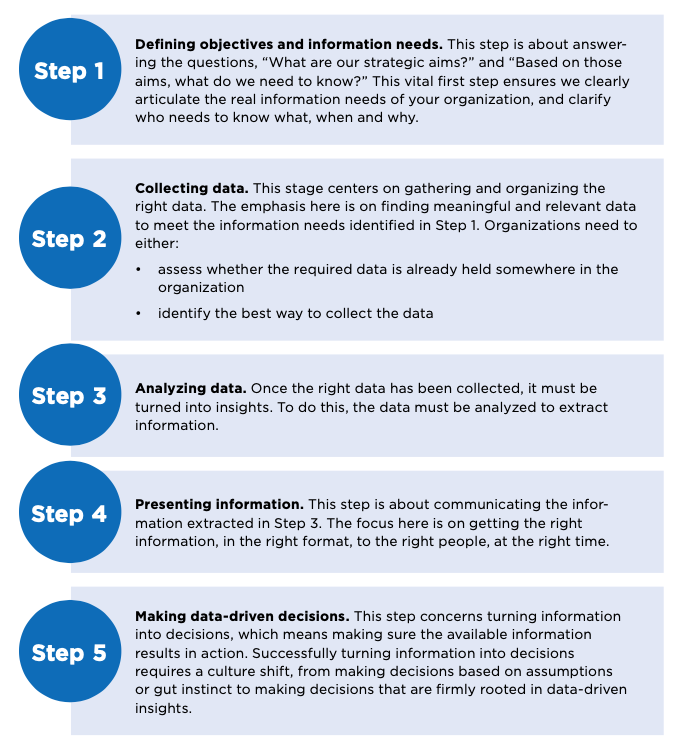

Abbildung 1: CPA Five Step Modell (Marr, 2020)

---

#STEP 1 : Defining objektictive and information needed

Verbindung zu GIT

In [1]:
!pip install -q xlrd
!git clone https://github.com/Lossophy/BINA-Projekt.git

Cloning into 'BINA-Projekt'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 143 (delta 73), reused 34 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 3.63 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (73/73), done.


Installation externer Pakete

In [2]:
# Vorbereitung mit bar_chart_race (externes Paket)
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.1 MB/s eta 0:00:00


Import librarys

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, widgets
import plotly.express as px
from IPython.display import display
from IPython.display import clear_output
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'  # oder 'iframe' oder 'plotly_mimetype'
import seaborn as sns
import bar_chart_race as bcr


In [4]:
# Stil setzen (modern & clean)
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (14, 6),
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})


Dataimport

In [5]:
df = pd.read_csv('/content/BINA-Projekt/Data/ogd115_gest_bilanz.csv')

In [6]:
df.head()

,Jahr,Rubrik,Energietraeger,TJ
0,1980,Bruttoverbrauch,Elektrizität,-29450.0
1,1980,Bruttoverbrauch,Erdölprodukte,321250.0
2,1980,Bruttoverbrauch,Fernwärme,0.0
3,1980,Bruttoverbrauch,Gas,36280.0
4,1980,Bruttoverbrauch,Holzenergie,26280.0


Widgetdefinition

In [7]:
von_jahr_widget = widgets.Dropdown(
    options=sorted(df['Jahr'].unique()),
    description='Jahr',
    disabled=False,
)

In [8]:
bis_jahr_widget = widgets.Dropdown(
    options=sorted(df['Jahr'].unique()),
    description='Jahr',
    disabled=False,
)

In [9]:
rubrik_widget = widgets.Dropdown(
    options=sorted(df['Rubrik'].unique()),
    value=df['Rubrik'].unique()[0],
    description='Rubrik:'
)


In [10]:
energietraeger_widget = widgets.Dropdown(
    options=sorted(df['Energietraeger'].unique()),
    value=df['Energietraeger'].unique()[0],
    description='energietraeger:'
)


In [11]:
multi_energietraeger_widget = widgets.SelectMultiple(
    options=sorted(df['Energietraeger'].unique()),
    value=tuple(df['Energietraeger'].unique()),
    description='Energie:'
)

In [12]:
# Interaktive Funktion definieren
def bal_plot_daten(jahr, rubrik, energietraeger):
    gefiltert = df[(df['Jahr'] == jahr) &
                   (df['Rubrik'] == rubrik) &
                   (df['Energietraeger'] == energietraeger)]

    if gefiltert.empty:
        print("Keine Daten für diese Kombination.")
        return

    plt.figure(figsize=(6,4))
    plt.bar([0], gefiltert['TJ'], tick_label=[f"{jahr}"])
    plt.ylabel('TJ')
    plt.title(f"{rubrik} - {energietraeger} ({jahr})")
    plt.show()

# Interaktive Ansicht verbinden
ui = widgets.VBox([von_jahr_widget, rubrik_widget, energietraeger_widget])
out = widgets.interactive_output(bal_plot_daten, {
    'jahr': von_jahr_widget,
    'rubrik': rubrik_widget,
    'energietraeger': energietraeger_widget
})

display(ui, out)

Output()

In [ ]:
# Plot-Funktion
def plot_daten(von_jahr, bis_jahr, rubrik, energietraeger):
    if von_jahr > bis_jahr:
        print("Fehler: 'Von Jahr' darf nicht größer als 'Bis Jahr' sein.")
        return

    gefiltert = df[(df['Jahr'] >= von_jahr) &
                   (df['Jahr'] <= bis_jahr) &
                   (df['Rubrik'] == rubrik) &
                   (df['Energietraeger'] == energietraeger)]

    if gefiltert.empty:
        print("Keine Daten für diese Auswahl.")
        return

    gruppiert = gefiltert.groupby('Jahr')['TJ'].sum().reset_index()

    plt.figure(figsize=(25,10))
    plt.plot(gruppiert['Jahr'].astype(int), gruppiert['TJ'], marker='o')
    plt.xticks(gruppiert['Jahr'].astype(int))
    plt.xlabel('Jahr')
    plt.ylabel('TJ')
    plt.title(f'{rubrik} - {energietraeger} ({von_jahr}–{bis_jahr})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Anzeige
ui = widgets.VBox([von_jahr_widget, bis_jahr_widget, rubrik_widget, energietraeger_widget])
out = widgets.interactive_output(plot_daten, {
    'von_jahr': von_jahr_widget,
    'bis_jahr': bis_jahr_widget,
    'rubrik': rubrik_widget,
    'energietraeger': energietraeger_widget
})
clear_output()
display(ui, out)


Output()

In [ ]:
jahre = sorted(df['Jahr'].unique())
rubriken = ['(Alle Rubriken)'] + sorted(df['Rubrik'].dropna().unique())

# Funktion mit schönerem Plot
def plot_energie(jahr_von, jahr_bis, rubrik_auswahl):
    daten = df[(df['Jahr'] >= jahr_von) & (df['Jahr'] <= jahr_bis)]

    if rubrik_auswahl != '(Alle Rubriken)':
        daten = daten[daten['Rubrik'] == rubrik_auswahl]

    pivot = daten.pivot_table(index='Jahr', columns='Energietraeger', values='TJ', aggfunc='sum')

    ax = pivot.plot(marker='o', linewidth=2)

    # Stilistische Verbesserungen
    plt.title(f"Energieverbrauch ({rubrik_auswahl}) {jahr_von}–{jahr_bis}", fontsize=20, weight='bold')
    plt.xlabel("Jahr")
    plt.ylabel("Verbrauch in TJ")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Energieträger', loc='upper left', bbox_to_anchor=(1.0, 1.0))
    sns.despine()
    plt.tight_layout()
    plt.show()

# Interaktive Oberfläche
interact(
    plot_energie,
    jahr_von=widgets.IntSlider(min=min(jahre), max=max(jahre), step=1, value=min(jahre), description='Von Jahr'),
    jahr_bis=widgets.IntSlider(min=min(jahre), max=max(jahre), step=1, value=max(jahre), description='Bis Jahr'),
    rubrik_auswahl=widgets.Dropdown(options=rubriken, description='Rubrik'),
)


interactive(children=(IntSlider(value=1980, description='Von Jahr', max=2023, min=1980), IntSlider(value=2023,…

<function __main__.plot_energie(jahr_von, jahr_bis, rubrik_auswahl)>

In [ ]:
jahre = sorted(df['Jahr'].unique())
rubriken = ['(Alle Rubriken)'] + sorted(df['Rubrik'].dropna().unique())

# === Interaktive Plot-Funktion ===
def plot_area(jahr_von, jahr_bis, rubrik_auswahl):
    daten = df[(df['Jahr'] >= jahr_von) & (df['Jahr'] <= jahr_bis)]

    if rubrik_auswahl != '(Alle Rubriken)':
        daten = daten[daten['Rubrik'] == rubrik_auswahl]

    pivot = daten.pivot_table(index='Jahr', columns='Energietraeger', values='TJ', aggfunc='sum')
    pivot.fillna(0, inplace=True)

    # === Area Plot ===
    ax = pivot.plot.area(alpha=0.7)

    plt.title(f"Energieverbrauch ({rubrik_auswahl}) {jahr_von}–{jahr_bis}", fontsize=20, weight='bold')
    plt.xlabel("Jahr")
    plt.ylabel("Verbrauch in TJ")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Energieträger', loc='upper left', bbox_to_anchor=(1.0, 1.0))
    sns.despine()
    plt.tight_layout()
    plt.show()

# === Interaktive Steuerung ===
interact(
    plot_area,
    jahr_von=widgets.IntSlider(min=min(jahre), max=max(jahre), step=1, value=min(jahre), description='Von Jahr'),
    jahr_bis=widgets.IntSlider(min=min(jahre), max=max(jahre), step=1, value=max(jahre), description='Bis Jahr'),
    rubrik_auswahl=widgets.Dropdown(options=rubriken, description='Rubrik'),
)

interactive(children=(IntSlider(value=1980, description='Von Jahr', max=2023, min=1980), IntSlider(value=2023,…

<function __main__.plot_area(jahr_von, jahr_bis, rubrik_auswahl)>

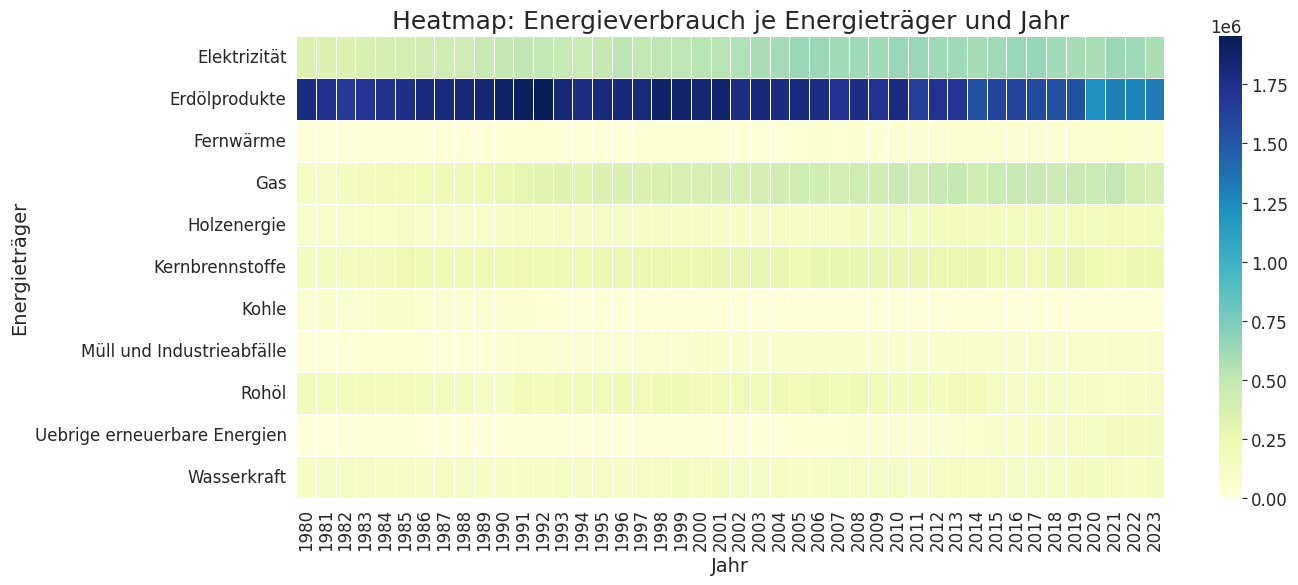

In [ ]:
pivot = df.pivot_table(index='Energietraeger', columns='Jahr', values='TJ', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap: Energieverbrauch je Energieträger und Jahr")
plt.xlabel("Jahr")
plt.ylabel("Energieträger")
plt.show()

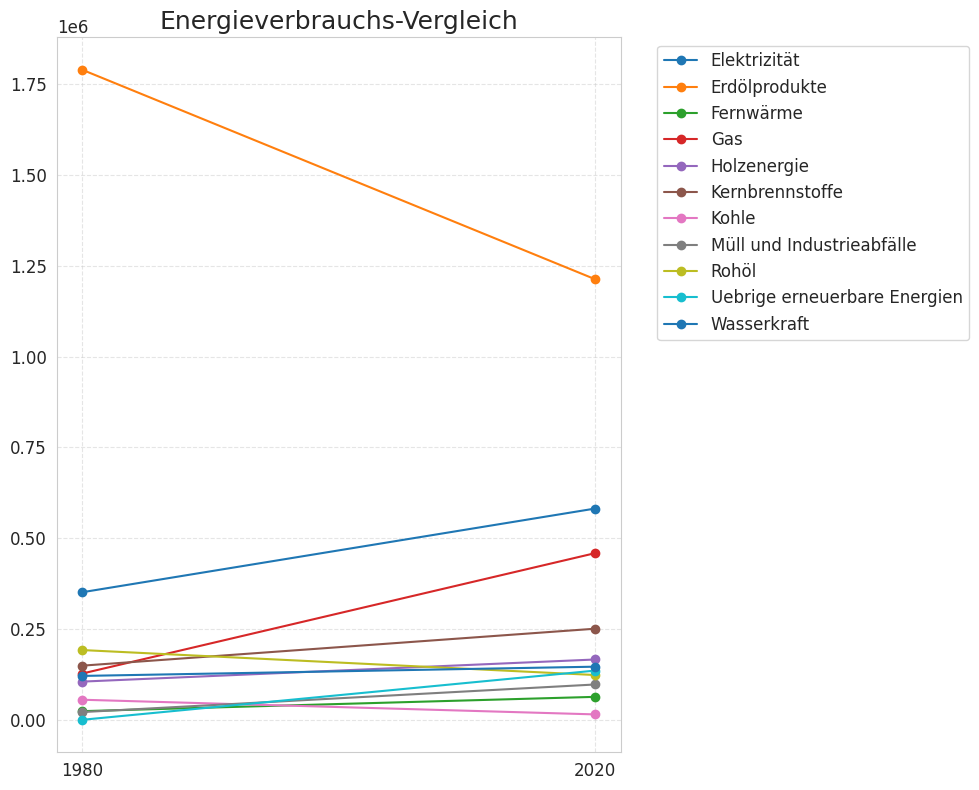

In [ ]:
jahr_start, jahr_ende = 1980, 2020
df_slope = df[df['Jahr'].isin([jahr_start, jahr_ende])]
df_pivot = df_slope.pivot_table(index='Energietraeger', columns='Jahr', values='TJ', aggfunc='sum').dropna()

fig, ax = plt.subplots(figsize=(10, 8))
for i in df_pivot.index:
    ax.plot([0, 1], df_pivot.loc[i], marker='o', label=i)

ax.set_xticks([0, 1])
ax.set_xticklabels([jahr_start, jahr_ende])
ax.set_title('Energieverbrauchs-Vergleich')
ax.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Korrelation der Energieträger')

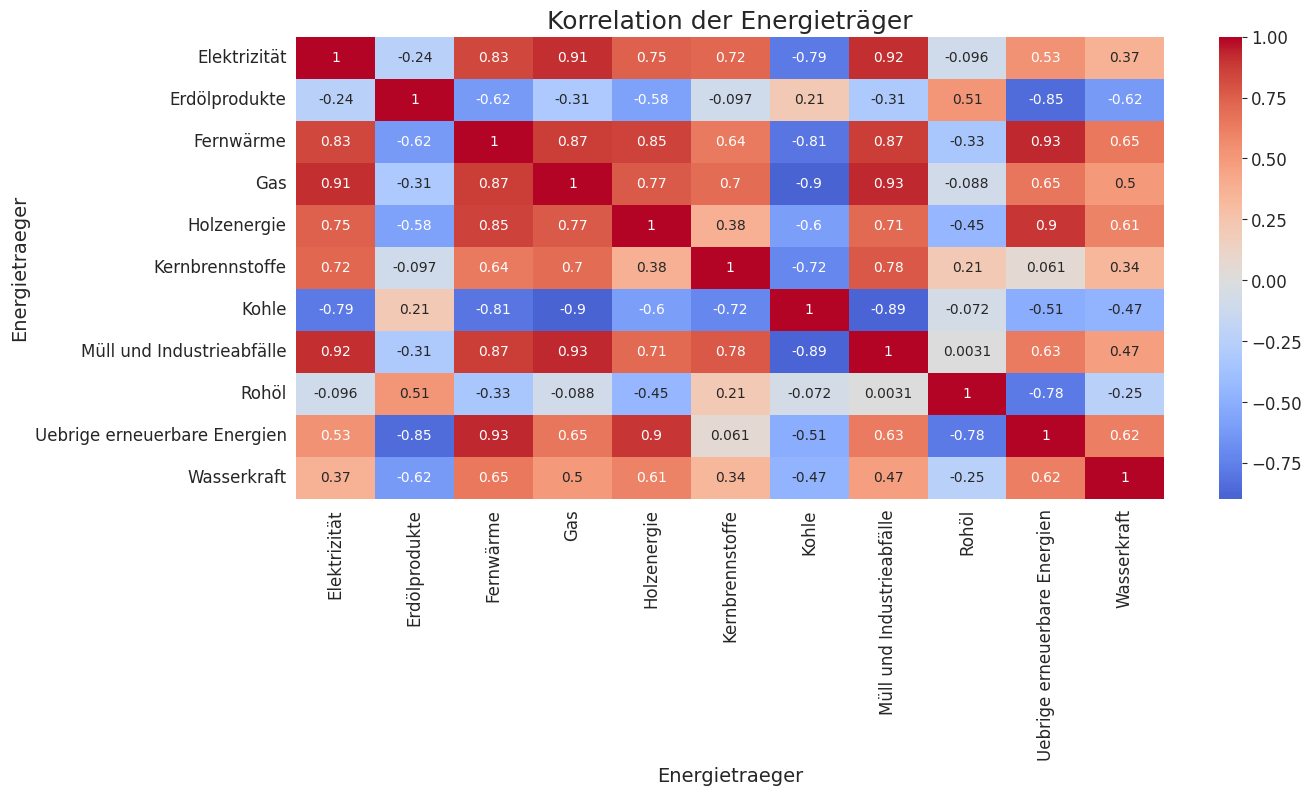

In [ ]:
df_corr = df.pivot_table(index='Jahr', columns='Energietraeger', values='TJ')
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Korrelation der Energieträger")

In [ ]:
df_bcr = df.pivot_table(index='Jahr', columns='Energietraeger', values='TJ', aggfunc='sum')
df_bcr.fillna(0, inplace=True)

bcr.bar_chart_race(
    df=df_bcr,
    filename=None,
    title='Energieverbrauch im Zeitverlauf',
    period_length=500,
    sort='desc',
    n_bars=10
)

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



In [ ]:
# === 🎯 Rubrik hier anpassen ===
ausgewählte_rubrik = 'Dienstleistungen'  # <- einfach hier den Namen ändern

# === Daten filtern ===
df_rubrik = df[df['Rubrik'] == ausgewählte_rubrik]

# === Pivot-Tabelle für das Bar Chart Race vorbereiten ===
df_pivot = df_rubrik.pivot_table(
    index='Jahr',
    columns='Energietraeger',
    values='TJ',
    aggfunc='sum'
).fillna(0)

# === Prüfen, ob genug Daten vorhanden sind ===
if df_pivot.shape[1] < 2:
    print(f"Nicht genug Daten für Rubrik '{ausgewählte_rubrik}' 😕")
else:
    # === Bar Chart Race erstellen (in Notebook) ===
    bcr.bar_chart_race(
        df=df_pivot,
        filename=None,  # Kein Export, direkt im Notebook
        title=f"Energieverbrauch – Rubrik: {ausgewählte_rubrik}",
        sort='desc',
        n_bars=8,
        period_length=700,
        steps_per_period=20
    )

Nicht genug Daten für Rubrik 'Dienstleistungen' 😕
